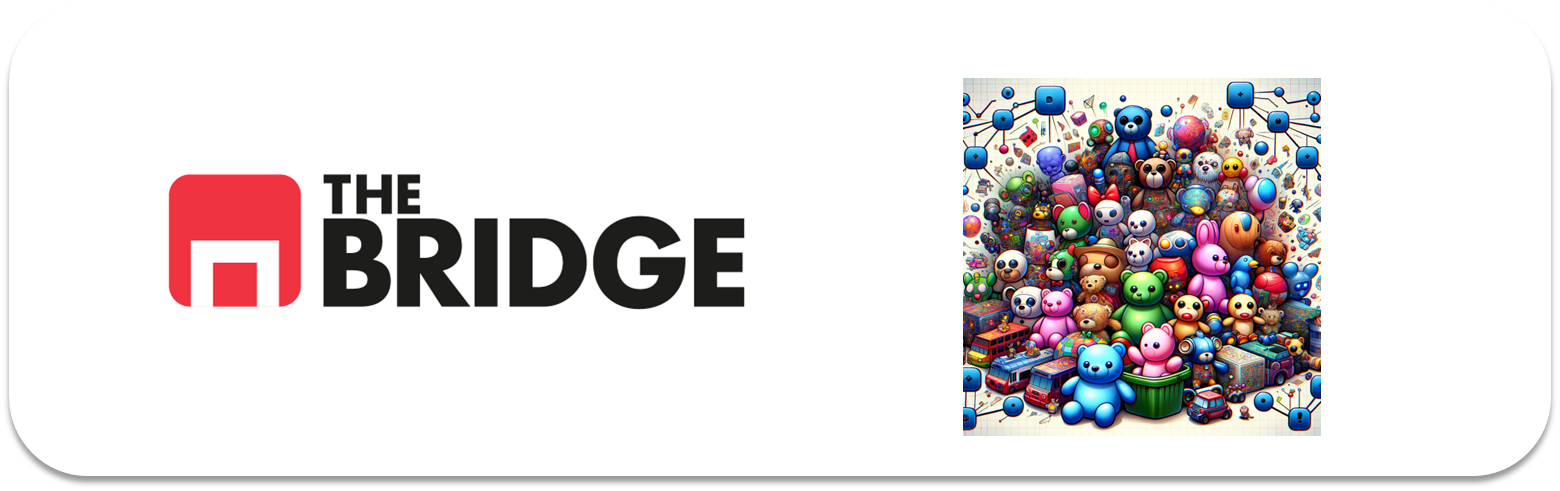

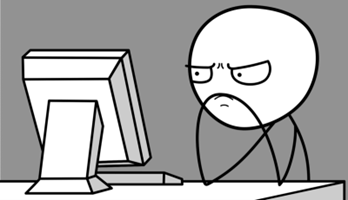

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1083]:
import pandas as pd
import numpy as np
import matplotlib
import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score,silhouette_samples

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [1084]:
df = pd.read_csv("./data/empowering_drinks.csv", sep= "|")

In [1085]:
df.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276


In [1086]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [1087]:
df.describe()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870


In [1088]:
def renombrar_columnas(df):
    df.columns = [unidecode.unidecode(col.lower().replace(' ', '_')) for col in df.columns]
    return df

In [1089]:
df = renombrar_columnas(df)
df

,azucares,vitaminas_del_grupo_b,cafeina,acido_citrico,taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276
...,...,...,...,...,...
148,0.493343,0.414820,-1.284344,0.009893,0.969783
149,0.332758,-0.389355,-1.344582,0.280575,2.224236
150,0.209232,0.012732,-1.354622,0.296498,1.834923
151,1.395086,1.365208,-1.274305,-0.595160,1.791666


In [1090]:

#Cardinalidad funcion
def cardinalidad(df,categoria = 10, continua = 30):
    # Nuevo df con columnas, cardinalidades, % variación cardinalidad, tipo de dato y variables
    df_cardi = pd.DataFrame([df.columns, df.nunique(), df.nunique()/len(df) * 100, df.dtypes])
    df_cardi = df_cardi.T 
    df_cardi = df_cardi.rename(columns = {0:"Columnas" , 1:"Cardinalidad", 2: "Porcentaje_Cardi", 3: "Tipo_dato"}) 

    # Corrección para cuando solo tengo un valor
    df_cardi.loc[df_cardi["Cardinalidad"] == 1, "Porcentaje_Cardi"] = 0.00

    # Tipo de variables
    df_cardi["Variable"] = "Categorica"
    df_cardi.loc[df_cardi["Cardinalidad"] == 2, "Variable"] = "Binaria"
    df_cardi.loc[df_cardi["Cardinalidad"] >= categoria, "Variable"] = "Numerica discreta"
    df_cardi.loc[df_cardi["Porcentaje_Cardi"] >= continua, "Variable"] = "Numerica continua"

    return df_cardi

In [1091]:
cardinalidad(df)

,Columnas,Cardinalidad,Porcentaje_Cardi,Tipo_dato,Variable
0,azucares,111,72.54902,float64,Numerica continua
1,vitaminas_del_grupo_b,75,49.019608,float64,Numerica continua
2,cafeina,121,79.084967,float64,Numerica continua
3,acido_citrico,112,73.202614,float64,Numerica continua
4,taurina,119,77.777778,float64,Numerica continua


In [1092]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(6, 3 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

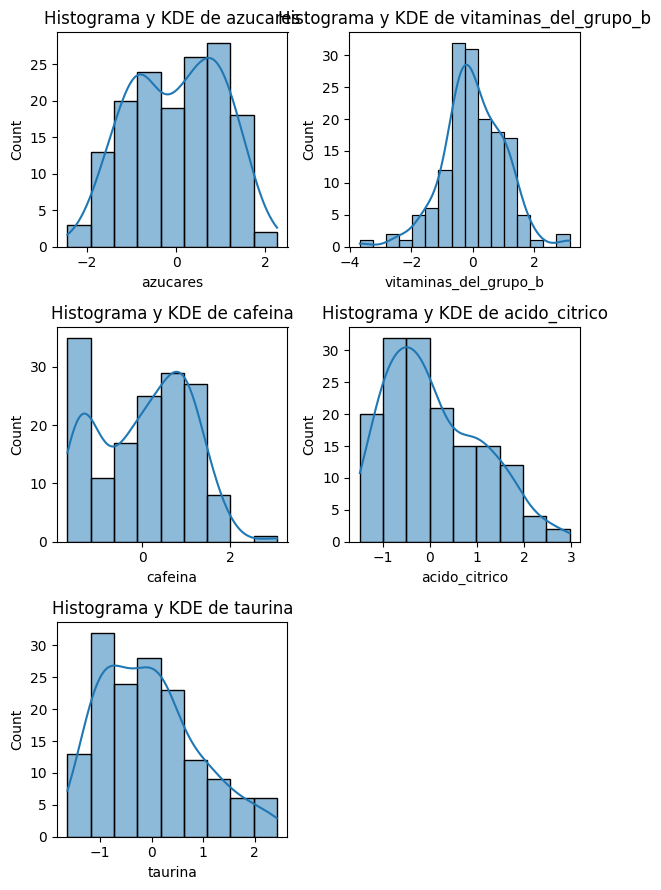

In [1093]:
plot_histo_dens(df,df.columns)

In [1094]:
def mapa_calor_correlacion( df,porcentaje):
    # Supongamos que df_eu es tu DataFrame y ya has calculado la matriz de correlación
    matriz_correlacion = df.corr()

    # Filtrar la matriz de correlación para dejar solo valores superiores a 0.5 o inferiores a -0.5
    filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)

    # Crear el mapa de calor
    plt.figure(figsize=(10, 10))
    sns.heatmap(filtro_correlacion,
                square=True, 
                annot=True, 
                cmap='Blues', 
                center=0,
                cbar_kws={'shrink': .5},
                linewidths=.5,
                linecolor='lightblue')

    plt.title(f'Mapa de Calor de Correlaciones (|correlación| > {porcentaje})')
    return plt.show()




C:\Users\gema.sanz\AppData\Local\Temp\ipykernel_26484\2253756189.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)


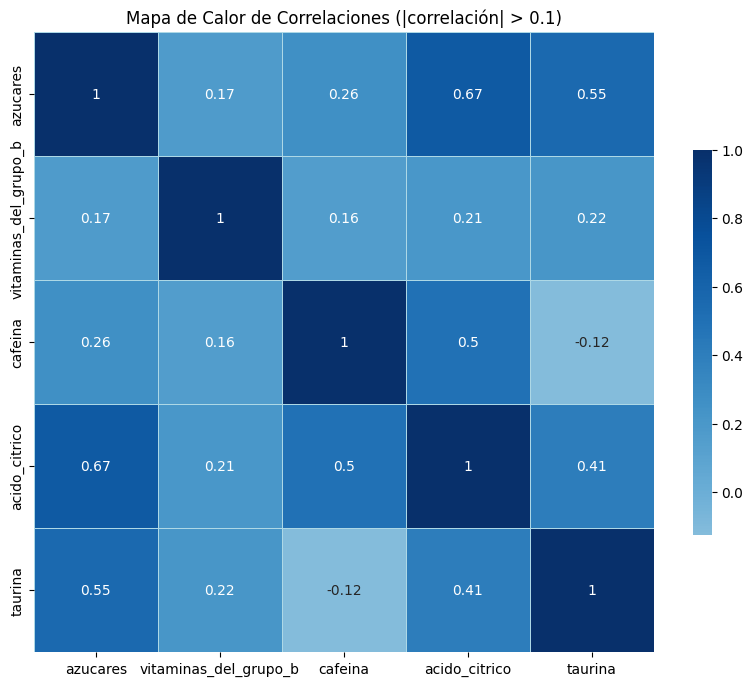

In [1095]:
mapa_calor_correlacion(df, 0.1)


In [1096]:
#Funcion para grafico de dispersión con 3 variables y todos los parametros
def dispersion_3_var(df,x1, z1):
    num_graphs = len(df.columns)
    for y1 in df.columns:
        plt.figure()  # Crea una nueva figura
        sns.scatterplot(x=x1,
                        y=y1,
                        size=df[z1],
                        hue=df[z1],
                        palette= "Blues",
                        data=df,
                        edgecolor='grey',
                        legend=False)  # Esto quita la leyenda)
    # Mostrar todas las gráficas
    return plt.show()

In [1097]:
# for col in df.columns:

#     dispersion_3_var(df,col, col)


# Con un PAIRPLOT TENEMOS TODA LA INFO MAS FACIL

In [1098]:
#Transformamos las var con logaritmos. NO SALE BIEN

# for col in df.columns:
#     nombre = f"{col}_log"
#     df[nombre] = np.log(df[col])
# df

# plot_histo_dens(df,df.columns)

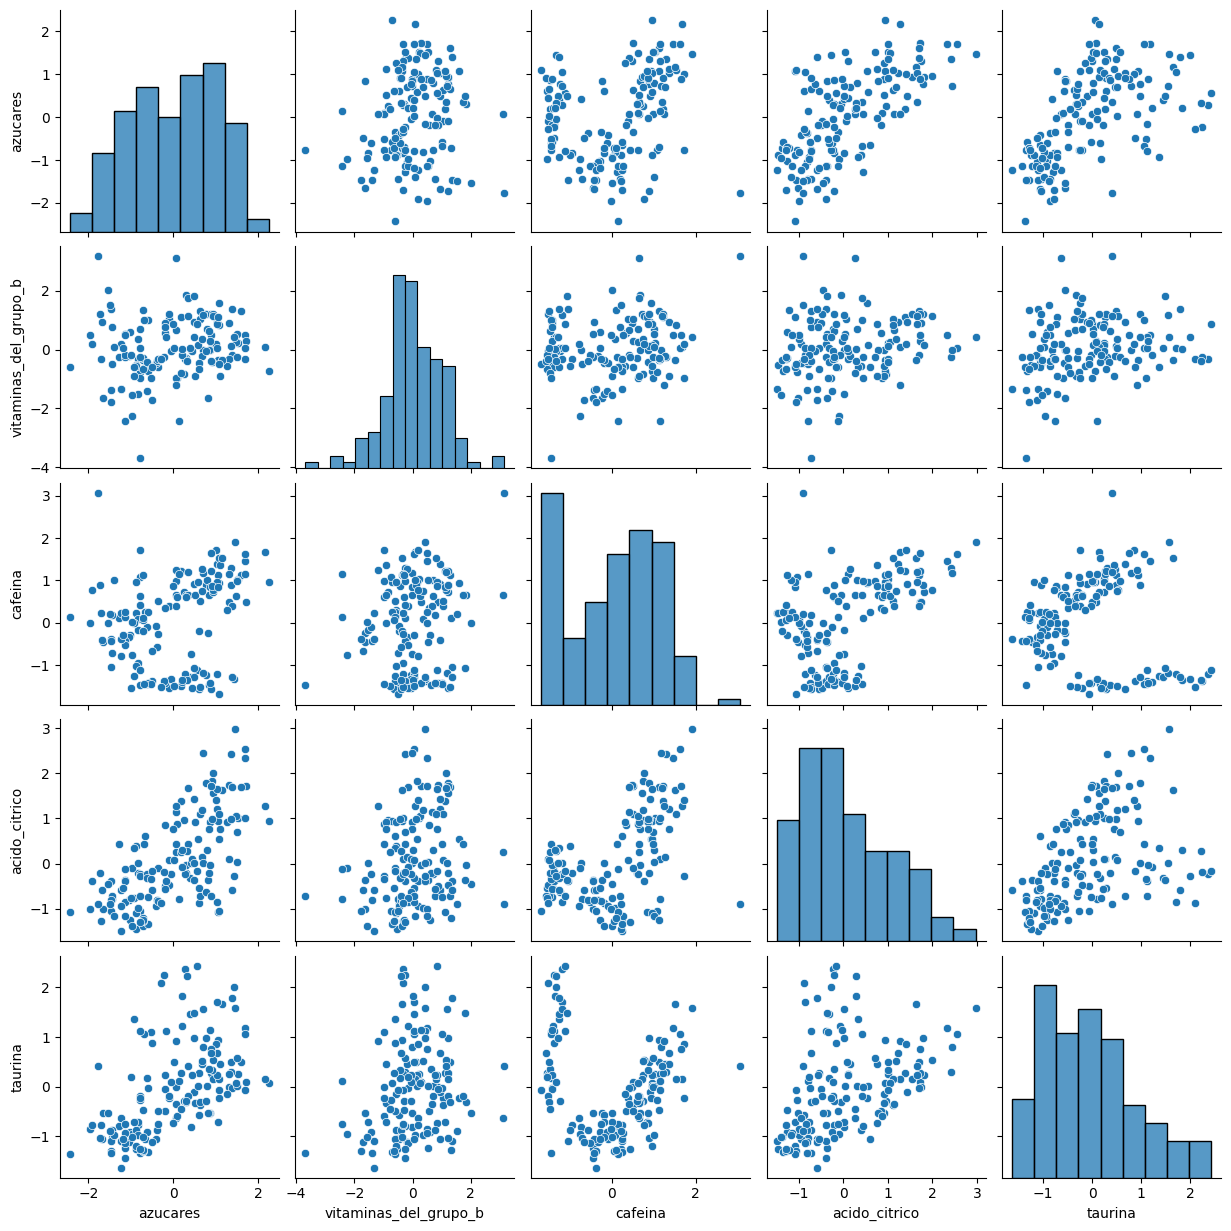

In [1099]:
sns.pairplot(df)

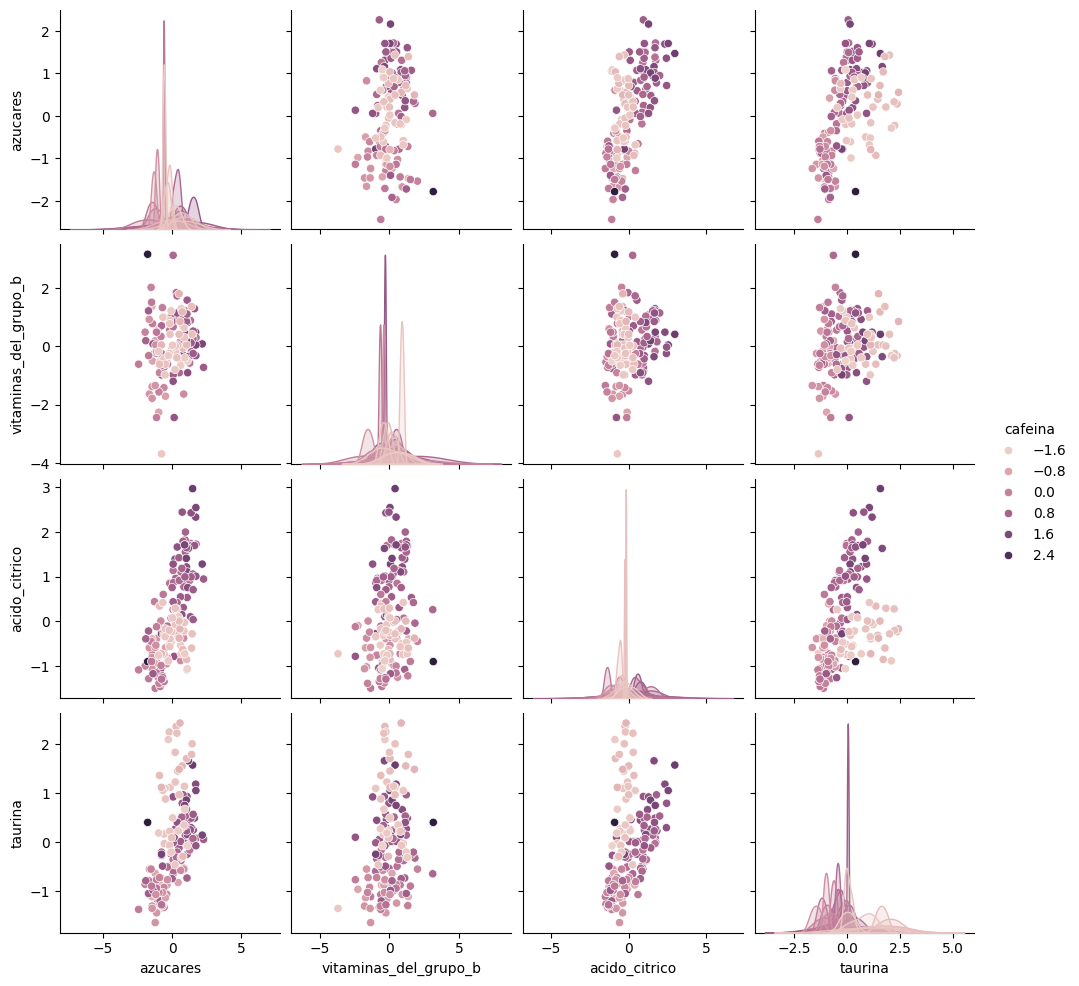

In [1100]:
sns.pairplot(df, hue= "cafeina")

In [1101]:
#TRANSFORMACION MIN MAX SCALER  

In [1102]:
minmax = MinMaxScaler()
df_scaler = df.copy()
df_scaler[df_scaler.columns] = minmax.fit_transform(df_scaler)
df_scaler.describe()
df_scaler.drop(columns=["acido_citrico"], inplace=True)

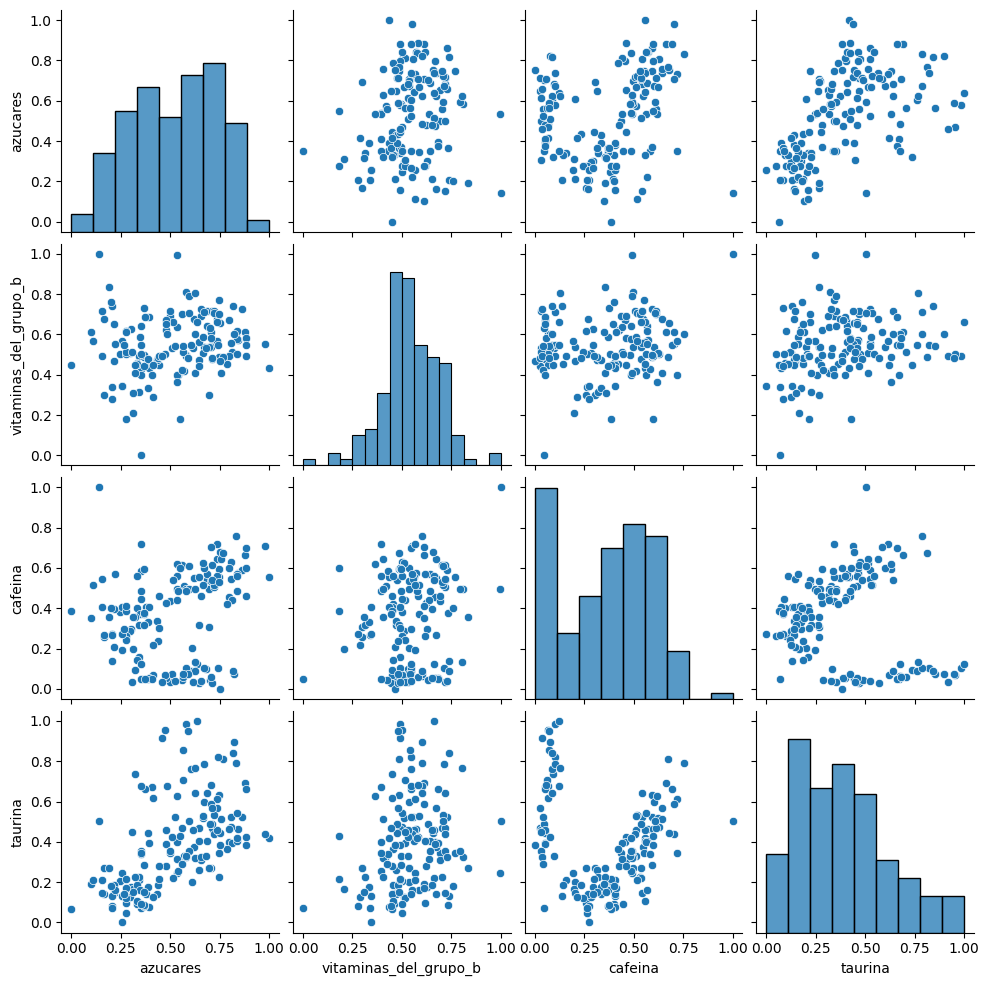

In [1103]:
sns.pairplot(df_scaler)

In [1104]:
#K MEAN METODO

In [1105]:
#METODO DEL CODO
#Vamos a probar con diferentes valores de k para ver cual es el mejor segun sus inercias y el metodo del codo
ks = []
inertias = []

for k in range(1, 11):
    clustering = KMeans(n_clusters = k)
    clustering.fit(df_scaler)
    inertias.append(clustering.inertia_)
    ks.append(k)

In [1106]:
# Dataframe con las inercias
df_inertias = pd.DataFrame({'k': ks, 'inertia': inertias})
df_inertias

,k,inertia
0,1,25.790910
1,2,16.890880
2,3,9.943657
3,4,8.596312
4,5,8.163312
5,6,6.580711
6,7,6.193850
7,8,5.520553
8,9,4.961911
9,10,4.985850


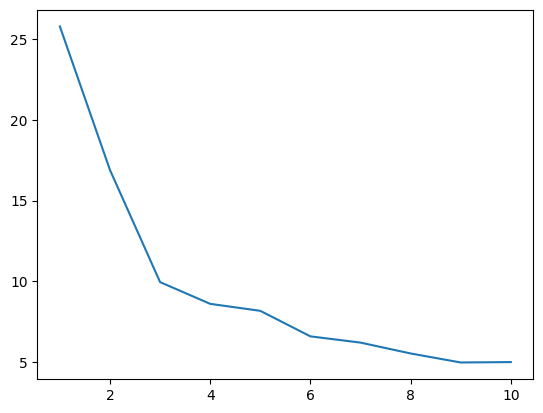

In [1107]:
plt.plot(ks, inertias);

In [1108]:
#Parece que la inercia más interesante es un k=3

In [1109]:
#METODO DE LA SILUETA

In [1110]:
#Calculamos el silhouette score para cada k
ks = []
sil_scores = []

for k in range(2, 10): 
    clustering = KMeans(n_clusters = k)
    clustering.fit(df_scaler)

    sil_scores.append(silhouette_score(df_scaler, clustering.labels_))
    ks.append(k)

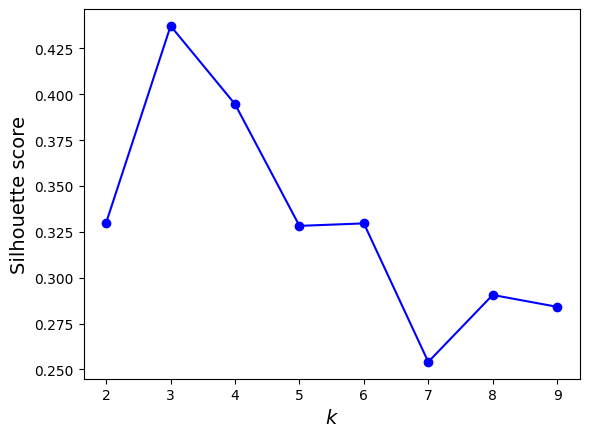

In [1111]:
# Graficamos el silhouette score para cada k
plt.plot(ks, sil_scores, "bo-");
plt.xlabel("$k$", fontsize=14);
plt.ylabel("Silhouette score", fontsize=14);

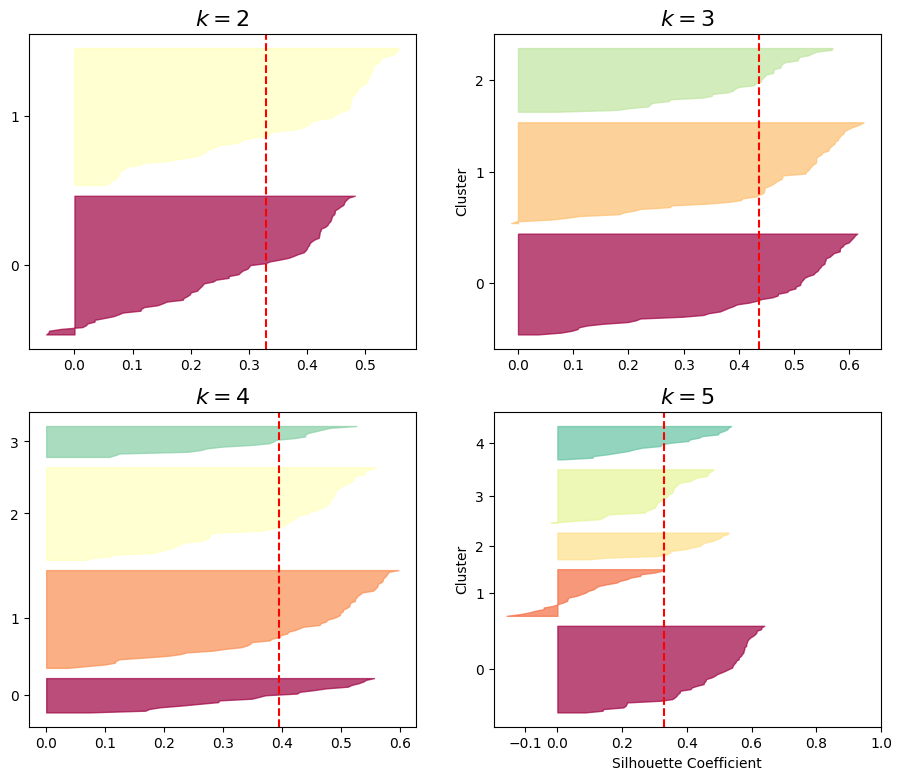

In [1112]:
from matplotlib.ticker import FixedLocator, FixedFormatter

'''
La anchura de cada cuchillo representa el numero de muestras por cluster. Están ordenadas
por su coeficiente de silhouette, por eso tiene esa forma de cuchillo. Cuanta más caida tenga
indica que las muestras tienen un coeficiente mas disperso en ese cluster
Deberian estar todos los clusters por encima de la media.
Hay algunas lineas hacia la izda xq es el coeficiente negativo. Puntos asignados al cluster erroneo.
'''
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    clustering = KMeans(n_clusters = k)
    clustering.fit(df_scaler)
    y_pred = clustering.labels_
    silhouette_coefficients = silhouette_samples(df_scaler, y_pred)

    padding = len(df_scaler) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = matplotlib.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=True)

    plt.axvline(x=sil_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


plt.show()

In [1113]:
#Segun los cuchillos k= 4 sería lo mejor
df_scaler_fit = df_scaler.copy()

In [1114]:
#KMeans con k = 3
clustering_k3 = KMeans(n_clusters= 3)
clustering_k3.fit(df_scaler_fit)

#KMeans con k = 4
clustering_k4 = KMeans(n_clusters= 4)
clustering_k4.fit(df_scaler_fit)

#KMeans con k = 5
clustering_k5 = KMeans(n_clusters= 5)
clustering_k5.fit(df_scaler_fit)

KMeans(n_clusters=5)

In [1115]:
#Creamos una nueva columna que indica el cluster asignado a cada observacion
df_scaler['cluster_k3'] = clustering_k3.predict(df_scaler_fit)
df_scaler['cluster_k4'] = clustering_k4.predict(df_scaler_fit)
df_scaler['cluster_k5'] = clustering_k5.predict(df_scaler_fit)
df_scaler.head()

,azucares,vitaminas_del_grupo_b,cafeina,taurina,cluster_k3,cluster_k4,cluster_k5
0,0.842105,0.572193,0.573840,0.463830,2,3,4
1,0.571053,0.417112,0.510549,0.329787,2,1,2
2,0.560526,0.700535,0.611814,0.468085,2,1,2
3,0.878947,0.609626,0.664557,0.693617,2,3,4
4,0.581579,0.807487,0.495781,0.323404,2,1,2


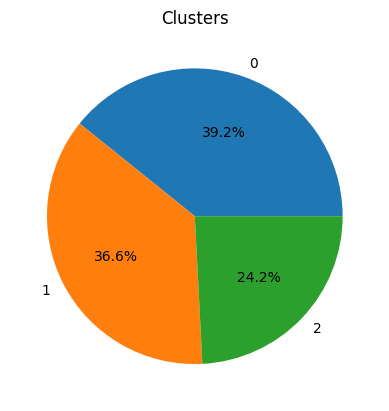

In [1116]:
# Graficamos la cantidad de elementos en cada cluster k=3
plt.pie(df_scaler['cluster_k3'].value_counts(normalize= True), autopct= '%1.1f%%', labels= ['0', '1',"2"])
plt.title('Clusters');

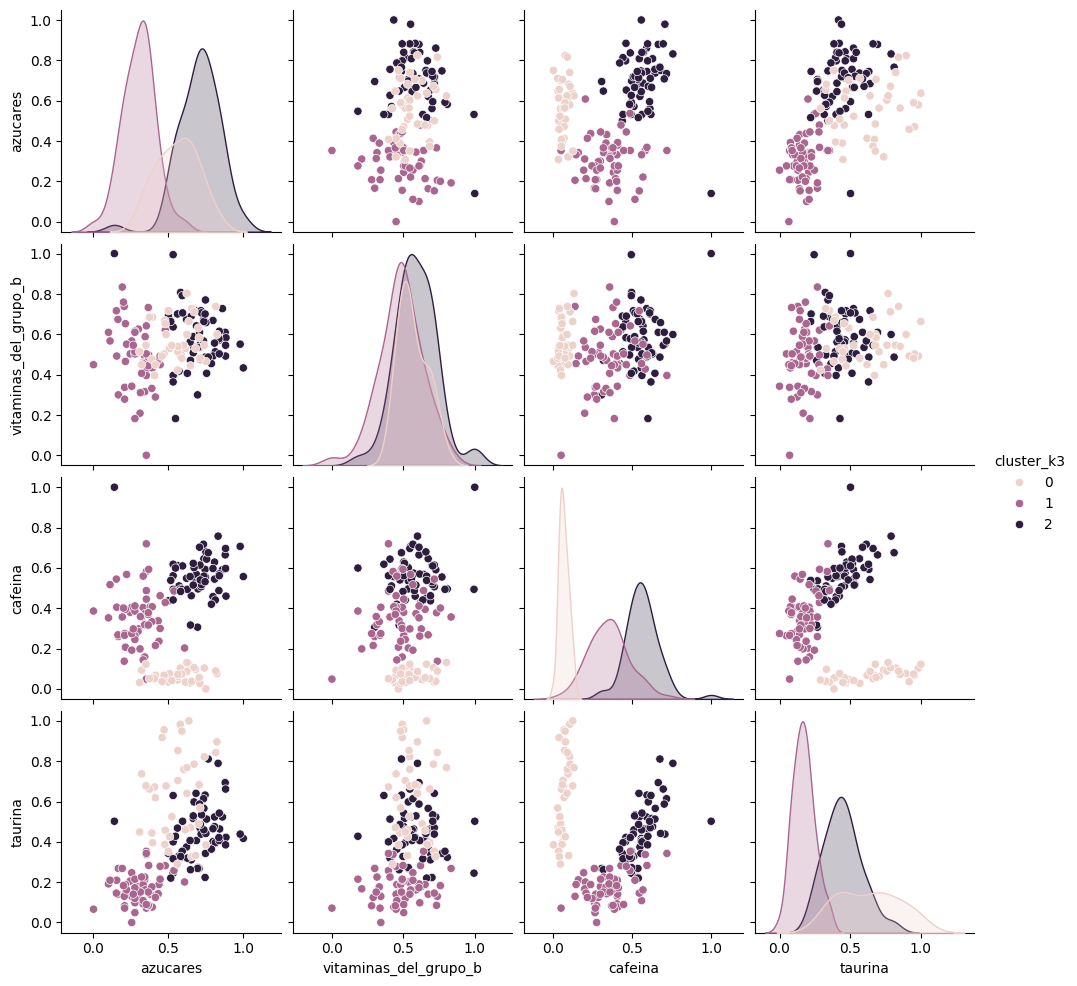

In [1117]:
#Podemos ver la distribucion de los clusters en el espacio de las variables k=3
sns.pairplot(data= df_scaler.drop(columns=["cluster_k4","cluster_k5"]), hue= 'cluster_k3');

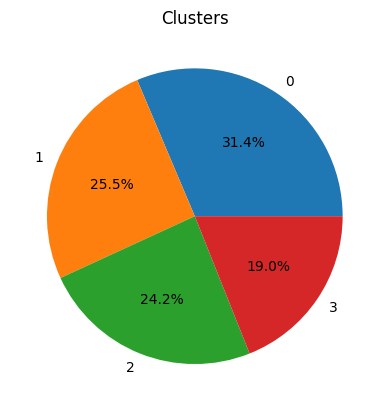

In [1118]:
# Graficamos la cantidad de elementos en cada cluster k=4
plt.pie(df_scaler['cluster_k4'].value_counts(normalize= True), autopct= '%1.1f%%', labels= ['0', '1',"2","3"])
plt.title('Clusters');

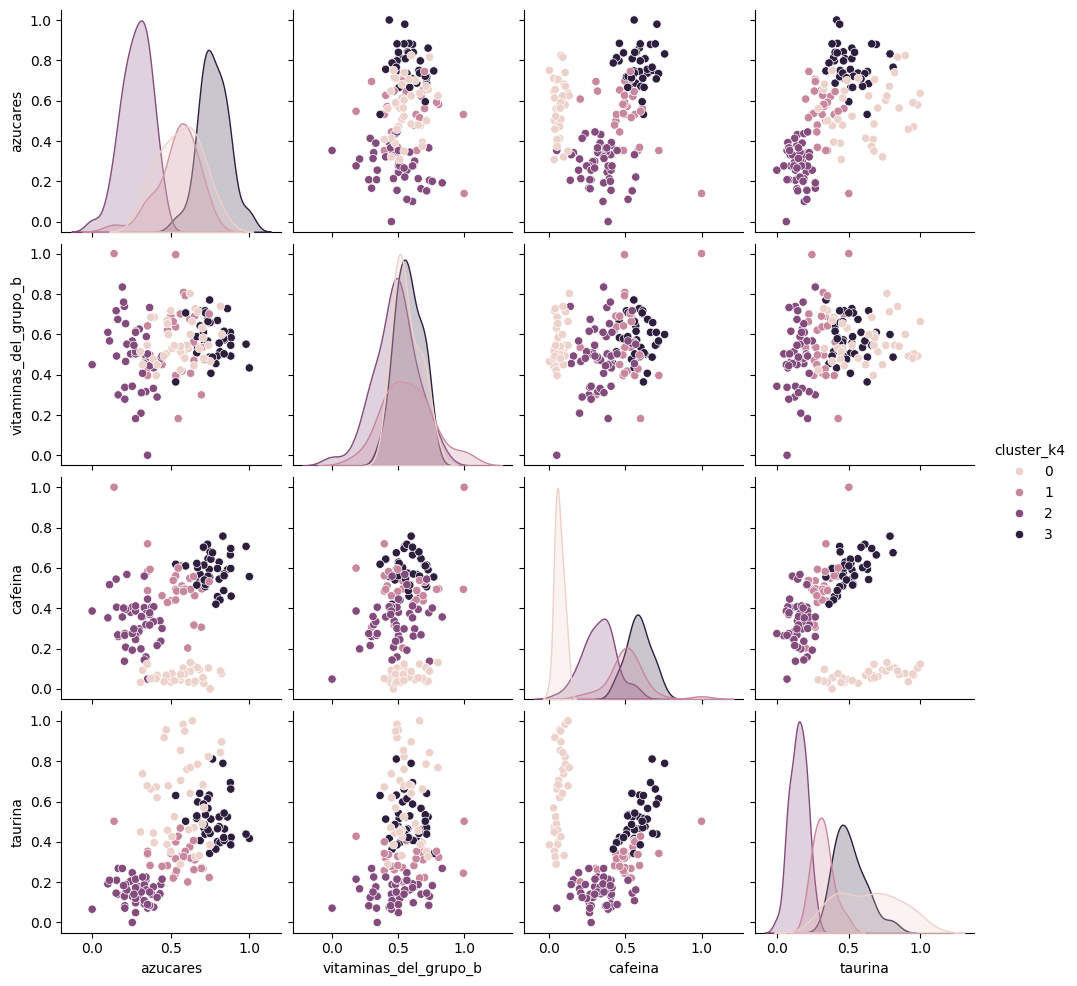

In [1119]:
#Podemos ver la distribucion de los clusters en el espacio de las variables k=3
sns.pairplot(data= df_scaler.drop(columns=["cluster_k3","cluster_k5"]), hue= 'cluster_k4');

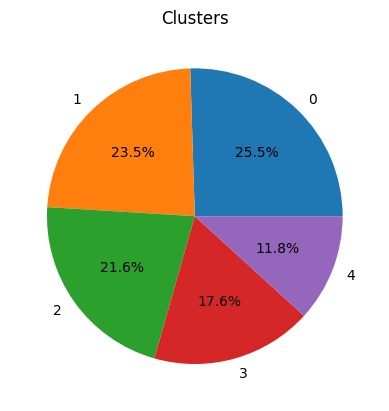

In [1120]:
# Graficamos la cantidad de elementos en cada cluster k=4
plt.pie(df_scaler['cluster_k5'].value_counts(normalize= True), autopct= '%1.1f%%', labels= ['0', '1',"2","3","4"])
plt.title('Clusters');

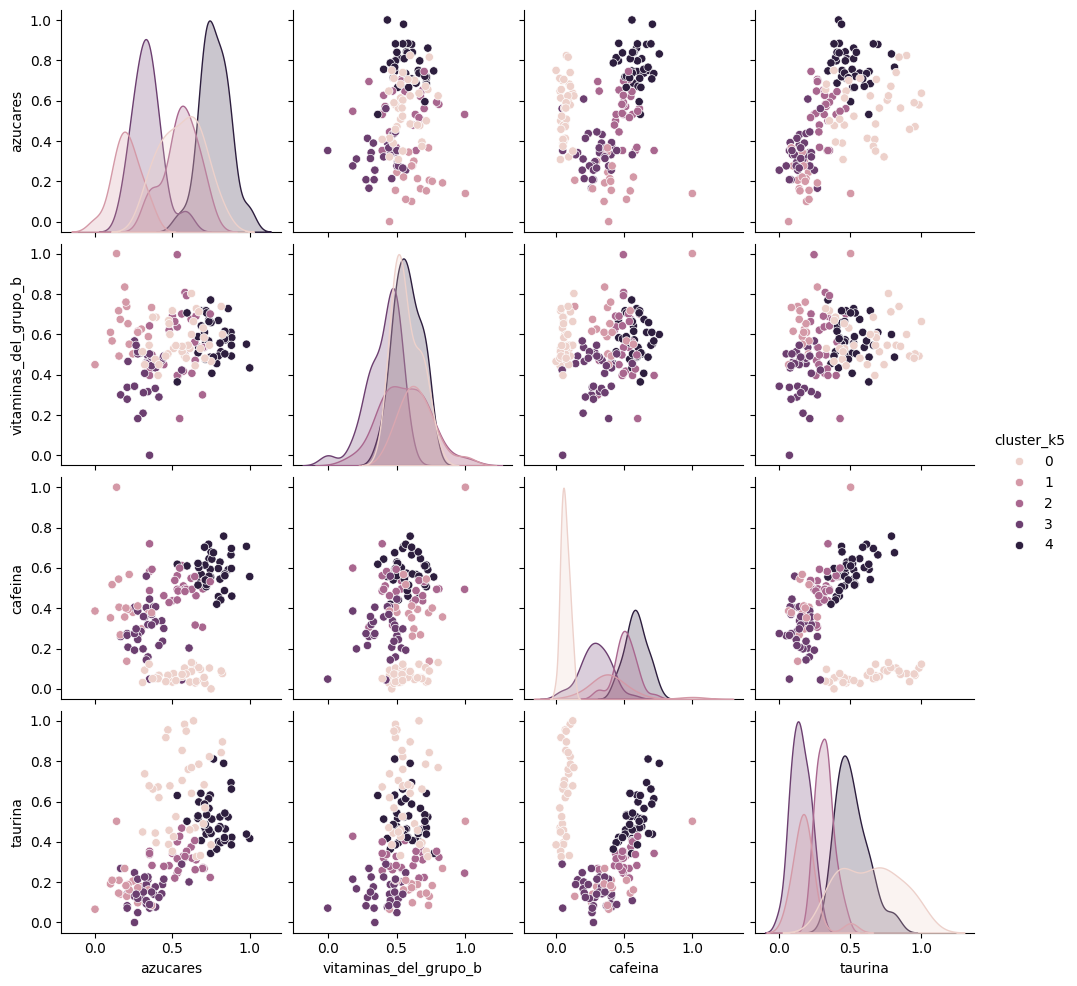

In [1121]:
#Podemos ver la distribucion de los clusters en el espacio de las variables k=3
sns.pairplot(data= df_scaler.drop(columns=["cluster_k3","cluster_k4"]), hue= 'cluster_k5');

In [1122]:
#METODO DBSCAN

In [1123]:
outlier_percent = []

for eps in np.linspace(0.001,3,50): # Genera 50 valores equidistantes entre 0.001 y 3
    
    # Creamos el modelo
    dbscan = DBSCAN(eps=eps,min_samples=4) # min_samples dos veces el ´numero de features -> 2 por dimensión del hiperespacio en el que representamos el conjunto de puntos... No le des muchas vueltas es un número muy orientativo. Pero piensa que si fuera un recta querrías 2 valores, un plano 4, un cubo 6...
    dbscan.fit(df_scaler)
   
     
    # Registramos el porcentaje de anomalías (recuerda que se etiquetan como -1)
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

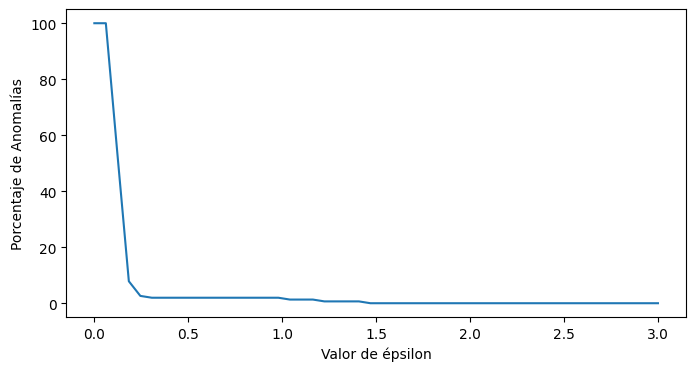

In [1124]:
#Vamos a pintar ahora el porcentaje de anomalías vs el valor de eps probado
plt.figure(figsize = (8,4), dpi = 100)
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Porcentaje de Anomalías")
plt.xlabel("Valor de épsilon")
plt.show()

In [1125]:
for indice,eps in [(indice,val) for indice,val in enumerate(np.linspace(0.001,3,50)) if 0.9 <= val <= 1.6]:
    print(f"Para {eps}: {outlier_percent[indice]}% de anomalías")

Para 0.9190612244897959: 1.9607843137254901% de anomalías
Para 0.980265306122449: 1.9607843137254901% de anomalías
Para 1.041469387755102: 1.3071895424836601% de anomalías
Para 1.1026734693877551: 1.3071895424836601% de anomalías
Para 1.163877551020408: 1.3071895424836601% de anomalías
Para 1.2250816326530611: 0.6535947712418301% de anomalías
Para 1.2862857142857143: 0.6535947712418301% de anomalías
Para 1.3474897959183672: 0.6535947712418301% de anomalías
Para 1.4086938775510203: 0.6535947712418301% de anomalías
Para 1.4698979591836734: 0.0% de anomalías
Para 1.5311020408163265: 0.0% de anomalías
Para 1.5923061224489796: 0.0% de anomalías


In [1126]:

dbscan = DBSCAN(eps = 1.3, min_samples=4)
dbscan.fit(df_scaler)

DBSCAN(eps=1.3, min_samples=4)

In [1127]:
df_scaler["dbscan"] = dbscan.labels_
df_scaler.dbscan.unique()

array([ 0,  1,  2,  3, -1], dtype=int64)

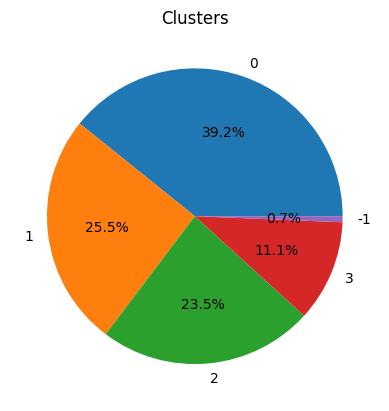

In [1128]:
# Graficamos la cantidad de elementos en cada cluster k=3
plt.pie(df_scaler["dbscan"].value_counts(normalize= True), autopct= '%1.1f%%', labels= df_scaler.dbscan.unique())
plt.title('Clusters');

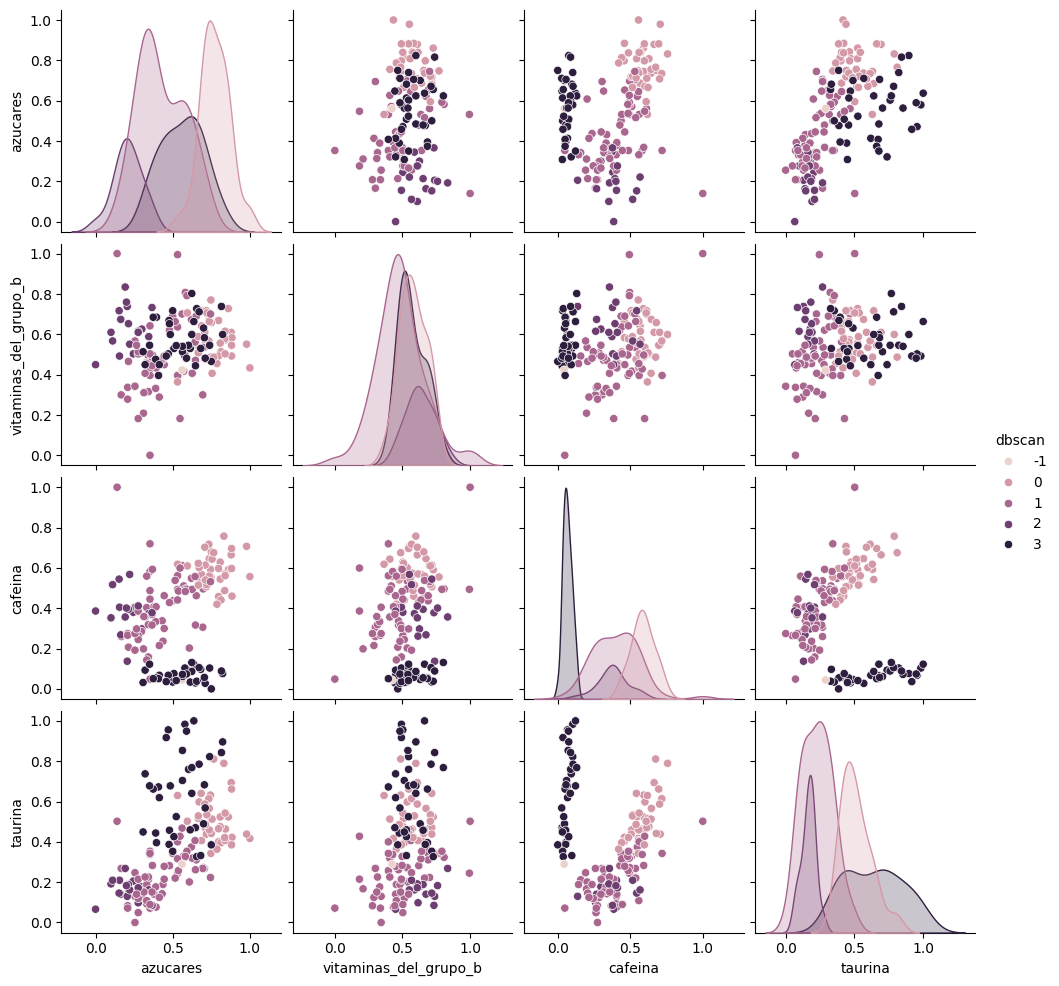

In [1129]:
#Podemos ver la distribucion de los clusters en el espacio de las variables k=3
sns.pairplot(data= df_scaler.drop(columns=["cluster_k3","cluster_k4","cluster_k5"]), hue= "dbscan");

In [1130]:
df_scaler

,azucares,vitaminas_del_grupo_b,cafeina,taurina,cluster_k3,cluster_k4,cluster_k5,dbscan
0,0.842105,0.572193,0.573840,0.463830,2,3,4,0
1,0.571053,0.417112,0.510549,0.329787,2,1,2,1
2,0.560526,0.700535,0.611814,0.468085,2,1,2,1
3,0.878947,0.609626,0.664557,0.693617,2,3,4,0
4,0.581579,0.807487,0.495781,0.323404,2,1,2,1
...,...,...,...,...,...,...,...,...
148,0.623684,0.598930,0.086498,0.640426,0,0,0,3
149,0.589474,0.481283,0.073840,0.948936,0,0,0,3
150,0.563158,0.540107,0.071730,0.853191,0,0,0,3
151,0.815789,0.737968,0.088608,0.842553,0,0,0,3


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [1131]:
df_nuevo = pd.read_csv("./data/new_experiments.csv", sep="|")
df_nuevo = renombrar_columnas(df_nuevo)
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   azucares               6 non-null      float64
 1   vitaminas_del_grupo_b  6 non-null      float64
 2   cafeina                6 non-null      float64
 3   acido_citrico          6 non-null      float64
 4   taurina                6 non-null      float64
dtypes: float64(5)
memory usage: 372.0 bytes


In [1132]:
minmax = MinMaxScaler()
df_scaler_nuevo = df_nuevo.copy()
df_scaler_nuevo[df_scaler_nuevo.columns] = minmax.fit_transform(df_scaler_nuevo)
df_scaler_nuevo.describe()
df_scaler_nuevo.drop(columns=["acido_citrico"], inplace=True)

In [1135]:
df_scaler_nuevo_fit = df_scaler_nuevo.copy()

In [1139]:
df_scaler_nuevo['cluster_k3'] = clustering_k3.predict(df_scaler_nuevo_fit)
df_scaler_nuevo['cluster_k4'] = clustering_k4.predict(df_scaler_nuevo_fit)
df_scaler_nuevo['cluster_k5'] = clustering_k5.predict(df_scaler_nuevo_fit)
dbscan.fit(df_scaler_nuevo_fit)
df_scaler_nuevo["dbscan"] = dbscan.labels_

In [1140]:
df_scaler_nuevo

,azucares,vitaminas_del_grupo_b,cafeina,taurina,cluster_k3,cluster_k4,cluster_k5,dbscan
0,1.000000,0.746032,1.000000,0.582596,2,3,4,0
1,0.726563,1.000000,0.732877,0.106195,2,1,2,0
2,0.000000,0.761905,0.417808,0.000000,1,2,1,0
3,0.441406,0.000000,0.267123,0.088496,1,2,3,0
4,0.238281,0.888889,0.000000,0.154867,1,2,1,0
5,0.835938,0.507937,0.071918,1.000000,0,0,0,0


### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.